In [2]:
import logging
import os
from itertools import combinations
from pathlib import Path
from typing import List, Optional, Literal

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import polars as pl
import seaborn as sns
from IPython.display import display


os.chdir("/root/py_projects/aihiii")

import src.utils.json_util as json_util
from src._StandardNames import StandardNames
from src.utils.custom_log import init_logger
from src.utils.set_rcparams import set_rcparams

set_rcparams()

LOG: logging.Logger = logging.getLogger(__name__)
STR: StandardNames = StandardNames()

init_logger(log_lvl=logging.INFO)
LOG.info("Working directory: %s", os.getcwd())

WIDTH: float = 448.13095 / 72 -0.2

2024-12-21 19:41:54,558     INFO  MainProcess  MainThread Working directory: /root/py_projects/aihiii


In [3]:
FIG_DIR: Path = Path() / "reports" / "figures"
FIG_DIR /= "eval_rocket"
FIG_DIR.mkdir(parents=True, exist_ok=True)
LOG.info("Figures in %s, exist - %s", FIG_DIR, FIG_DIR.is_dir())

2024-12-21 19:41:54,567     INFO  MainProcess  MainThread Figures in reports/figures/eval_rocket, exist - True


In [4]:
DATA_DIR:Path = Path("experiments")
LOG.info("Data in %s, exist - %s", DATA_DIR, DATA_DIR.is_dir())

2024-12-21 19:41:54,575     INFO  MainProcess  MainThread Data in experiments, exist - True


In [5]:
DIRS: List[Path] = sorted(DATA_DIR.glob("2024-12-2*-*-*-*_rocket_ann_95HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels"))
LOG.info("Rocket dirs (n=%s):\n%s", len(DIRS), DIRS)

2024-12-21 19:42:45,872     INFO  MainProcess  MainThread Rocket dirs (n=4):
[PosixPath('experiments/2024-12-20-21-03-54_rocket_ann_95HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels'), PosixPath('experiments/2024-12-21-01-32-30_rocket_ann_95HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels'), PosixPath('experiments/2024-12-21-04-45-16_rocket_ann_95HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels'), PosixPath('experiments/2024-12-21-08-26-48_rocket_ann_95HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels')]


In [15]:
def get_data() -> pd.DataFrame:
    results = []
    for res_dir in DIRS:
        LOG.info("Processing %s", res_dir)

        # get results
        results.append(pd.read_csv(res_dir / STR.fname_results_csv, index_col=[0,1]).loc[(-1, slice(None)), :].droplevel(STR.fold))

        # get para
        para = json_util.load(f_path=res_dir / STR.fname_para)
        results[-1][STR.perc] = para[STR.perc][STR.target][0]
        k = para[STR.pipeline]["n_kernels"]
        results[-1]["Kernels"] = "None" if k is None else k
        results[-1].set_index("Kernels", append=True, inplace=True)
        results[-1]["Median"] = results[-1].median(axis=1)

    results = pd.concat(results).sort_index().drop(columns=STR.perc)

    return results

RESULTS:pd.DataFrame = get_data()
RESULTS

2024-12-21 19:49:18,128     INFO  MainProcess  MainThread Processing experiments/2024-12-20-21-03-54_rocket_ann_95HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels
2024-12-21 19:49:18,136     INFO  MainProcess  MainThread Processing experiments/2024-12-21-01-32-30_rocket_ann_95HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels
2024-12-21 19:49:18,143     INFO  MainProcess  MainThread Processing experiments/2024-12-21-04-45-16_rocket_ann_95HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels
2024-12-21 19:49:18,149     INFO  MainProcess  MainThread Processing experiments/2024-12-21-08-26-48_rocket_ann_95HIII_injury_criteria_from_doe_sobol_20240705_194200_ft_channels


Chest_Deflection  Chest_VC  Chest_a3ms  \
Data  Kernels                                           
Test  20               0.915263  0.909451    0.725216   
      50               0.924122  0.925487    0.738737   
      100              0.918499  0.922426    0.728808   
      1000             0.000000  0.000000    0.000000   
Train 20               0.927513  0.929422    0.745672   
      50               0.922401  0.917595    0.710591   
      100              0.960505  0.949523    0.788909   
      1000             0.000000  0.000000    0.000000   

               Femur_Fz_Max_Compression  Head_HIC15  Head_a3ms  \
Data  Kernels                                                    
Test  20                       0.908611    0.901515   0.901189   
      50                       0.916270    0.917140   0.922333   
      100                      0.911353    0.915771   0.920981   
      1000                     0.000000    0.000000   0.000000   
Train 20                       0.924355    0.925452   0.916287   
      50                       0.800047    0.904241   0.909692   
      100                      0.312004    0.971720   0.943201   
      1000                     0.000000    0.516560   0.000000   

               Neck_Fx_Shear_Max  Neck_Fz_Max_Tension  Neck_My_Extension  \
Data  Kernels                                                              
Test  20                0.901486             0.866925           0.887020   
      50                0.911881             0.878669           0.907817   
      100               0.890730             0.867684           0.902954   
      1000              0.000000             0.000000           0.000000   
Train 20                0.920197             0.881898           0.895293   
      50                0.887130             0.862920           0.825451   
      100               0.942437             0.910626           0.951609   
      1000              0.000000             0.000000           0.000000   

                 Median  
Data  Kernels            
Test  20       0.901500  
      50       0.916705  
      100      0.913562  
      1000     0.000000  
Train 20       0.922276  
      50       0.895685  
      100      0.946362  
      1000     0.000000

,Data,Kernels,Chest_Deflection,Chest_VC,Chest_a3ms,Femur_Fz_Max_Compression,Head_HIC15,Head_a3ms,Neck_Fx_Shear_Max,Neck_Fz_Max_Tension,Neck_My_Extension,Median
0,Test,20,0.915263,0.909451,0.725216,0.908611,0.901515,0.901189,0.901486,0.866925,0.887020,0.901500
1,Test,50,0.924122,0.925487,0.738737,0.916270,0.917140,0.922333,0.911881,0.878669,0.907817,0.916705
2,Test,100,0.918499,0.922426,0.728808,0.911353,0.915771,0.920981,0.890730,0.867684,0.902954,0.913562
3,Test,1000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Train,20,0.927513,0.929422,0.745672,0.924355,0.925452,0.916287,0.920197,0.881898,0.895293,0.922276
5,Train,50,0.922401,0.917595,0.710591,0.800047,0.904241,0.909692,0.887130,0.862920,0.825451,0.895685
6,Train,100,0.960505,0.949523,0.788909,0.312004,0.971720,0.943201,0.942437,0.910626,0.951609,0.946362
7,Train,1000,0.000000,0.000000,0.000000,0.000000,0.516560,0.000000,0.000000,0.000000,0.000000,0.000000


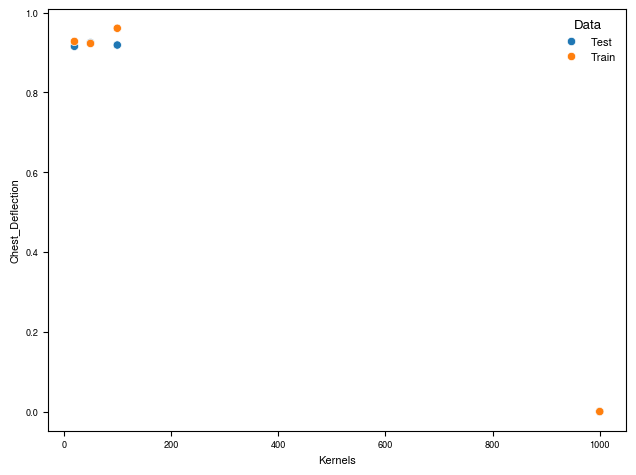

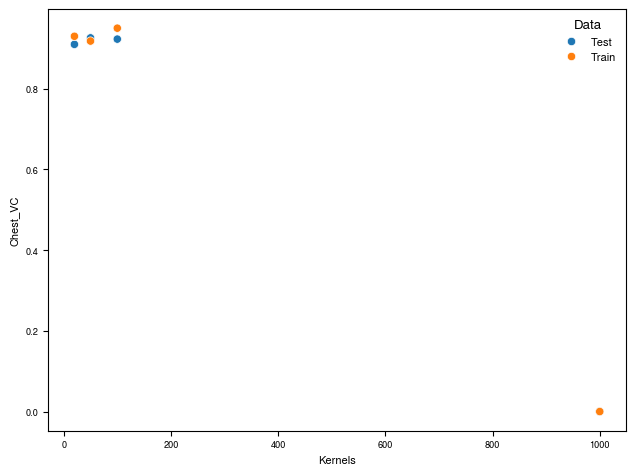

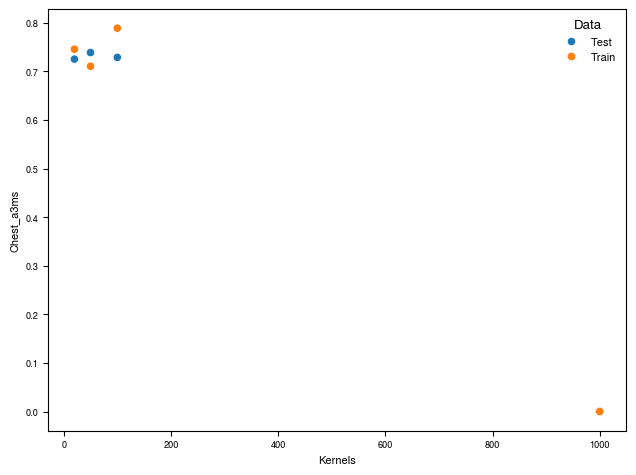

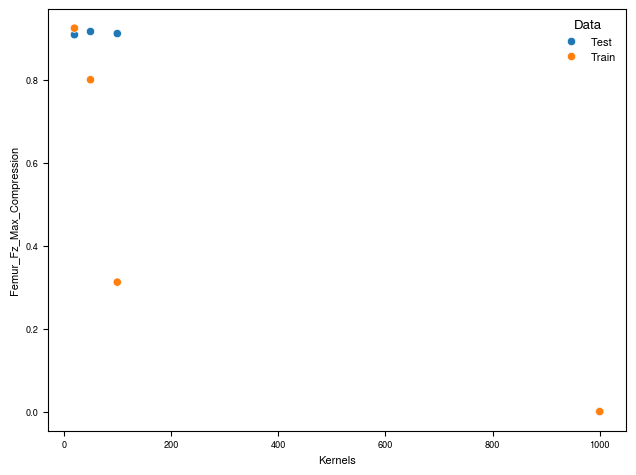

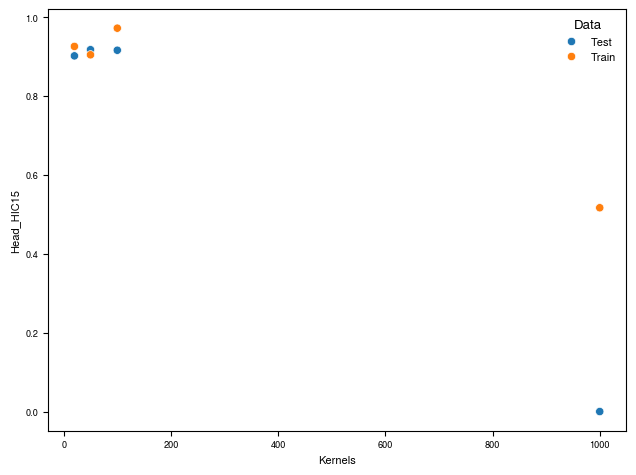

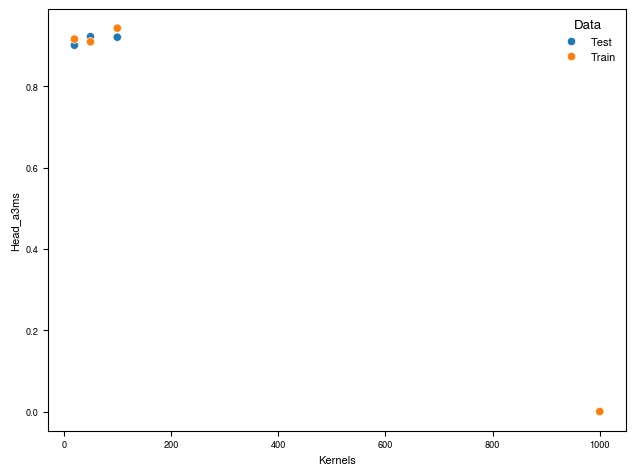

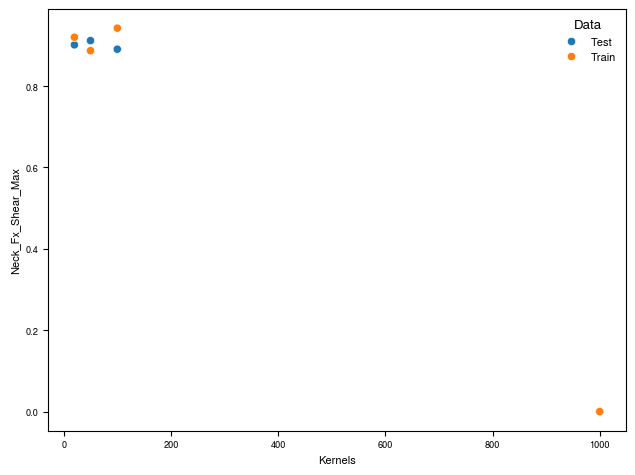

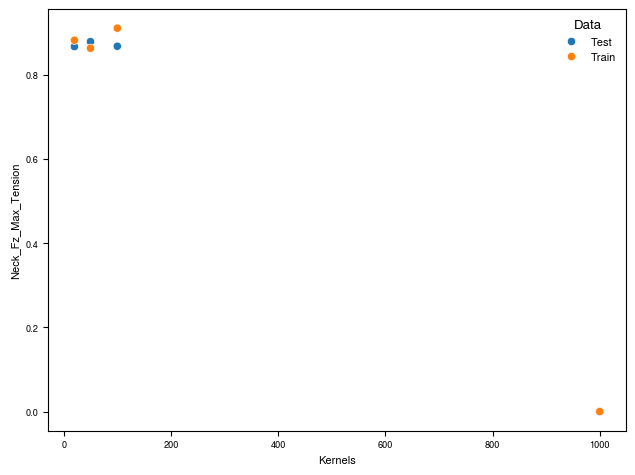

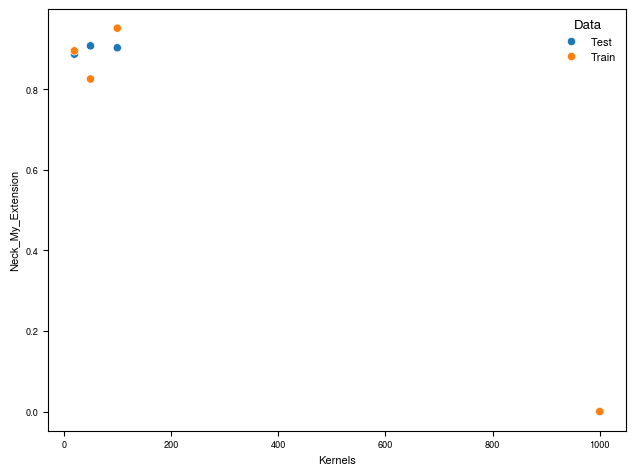

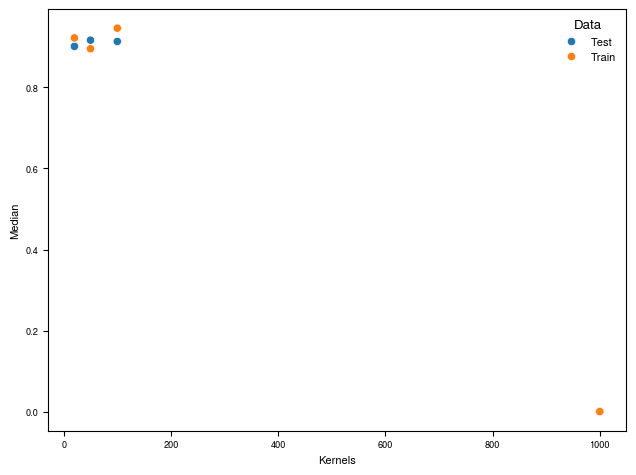

In [16]:
def plotter():
    
    db = RESULTS.reset_index()
    display(db)

    for col in RESULTS.columns:
        fig, ax = plt.subplots()
        sns.scatterplot(data=db, x="Kernels", y=col, hue="Data", ax=ax)

plotter()

In [30]:
pd.DataFrame(RESULTS["Median"]).reset_index().pivot(index="Kernels", columns="Data").round(2)

Median      
Data      Test Train
Kernels             
20        0.90  0.92
50        0.92  0.90
100       0.91  0.95
1000      0.00  0.00